In [27]:
import os
data_path = ['data']

In [28]:
import pandas as pd
import numpy as np

filepath = os.sep.join(data_path + ['College_Data.csv'])
df = pd.read_csv(filepath)

In [29]:
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [30]:
import pandas as pd

# Read the CSV file into a DataFrame and set the first column as the index
college2 = pd.read_csv('College_Data.csv', index_col=0) 

# Assuming the correct 
college2 = college2.rename(columns={'Unnamed: 0': 'College_Data'})

college2.head()


,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [31]:
#a numerical summary of the colleges
summary = college2.describe()
print(summary)

               Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      

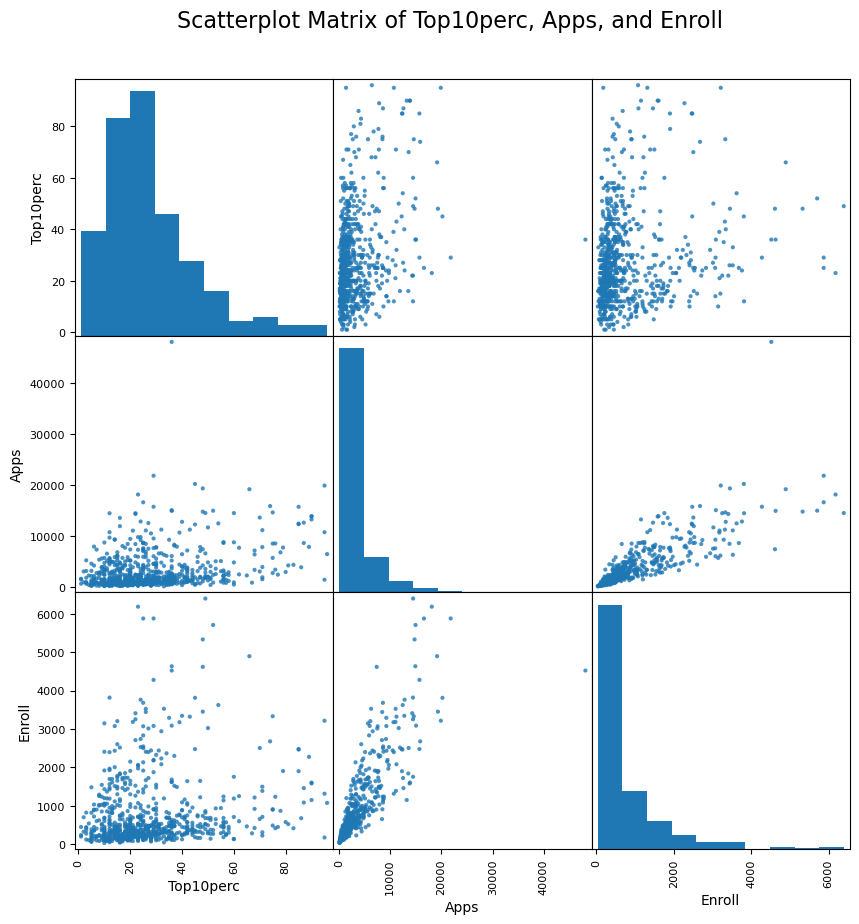

In [32]:
import matplotlib.pyplot as plt


# Create a scatterplot matrix without changing the index
selected_columns = ['Top10perc', 'Apps', 'Enroll']
selected_data = college2[selected_columns]

# Create a scatterplot matrix
scatter_matrix = pd.plotting.scatter_matrix(selected_data, alpha=0.8, figsize=(10, 10), diagonal='hist')

plt.suptitle('Scatterplot Matrix of Top10perc, Apps, and Enroll', y=0.95, fontsize=16)
plt.show()


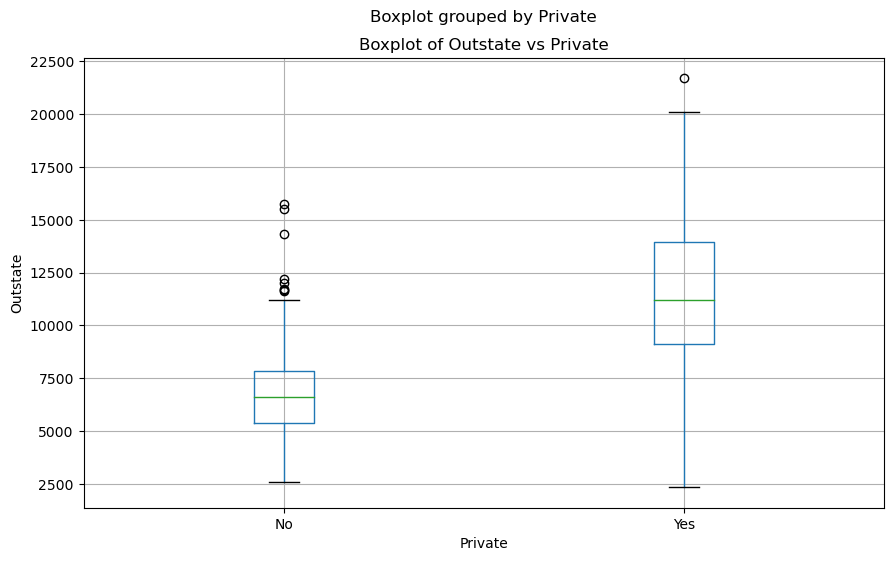

In [33]:
college2.boxplot(column='Outstate', by='Private', figsize=(10, 6))

# Customize the plot 
plt.title('Boxplot of Outstate vs Private')
plt.xlabel('Private')
plt.ylabel('Outstate')
plt.show()

In [34]:
# Create a new variable 'Elite' based on the condition
college2['Elite'] = college2['Top10perc'] > 50

# Convert 'Elite' to qualitative variable (Yes/No)
college2['Elite'] = college2['Elite'].replace({True: 'Yes', False: 'No'})

# Display the DataFrame with the new 'Elite' variable
print(college2[['Top10perc', 'Elite']].head())

                              Top10perc Elite
Abilene Christian University         23    No
Adelphi University                   16    No
Adrian College                       22    No
Agnes Scott College                  60   Yes
Alaska Pacific University            16    No


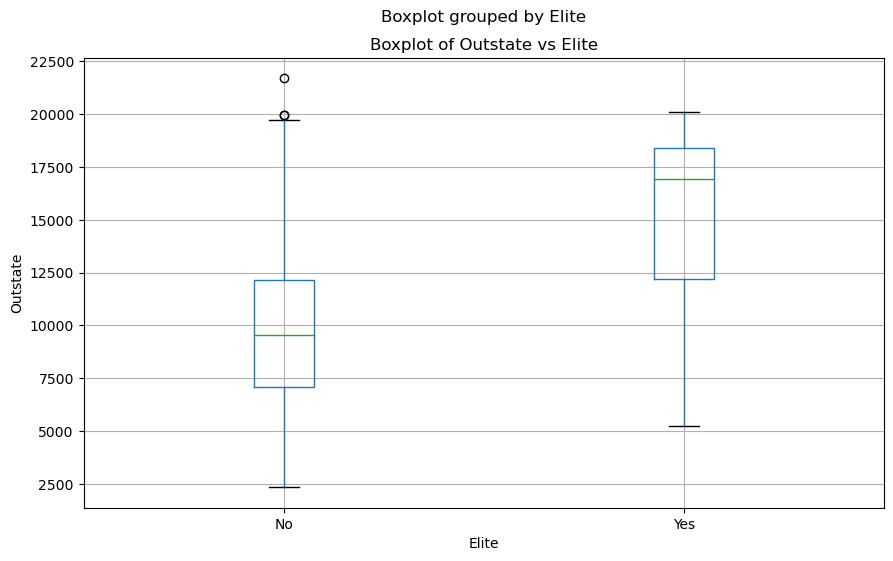

In [24]:
# Use boxplot to create side-by-side boxplots of Outstate versus Elite
college2.boxplot(column='Outstate', by='Elite', figsize=(10, 6))

# Customize the plot 
plt.title('Boxplot of Outstate vs Elite')
plt.xlabel('Elite')
plt.ylabel('Outstate')
plt.show()

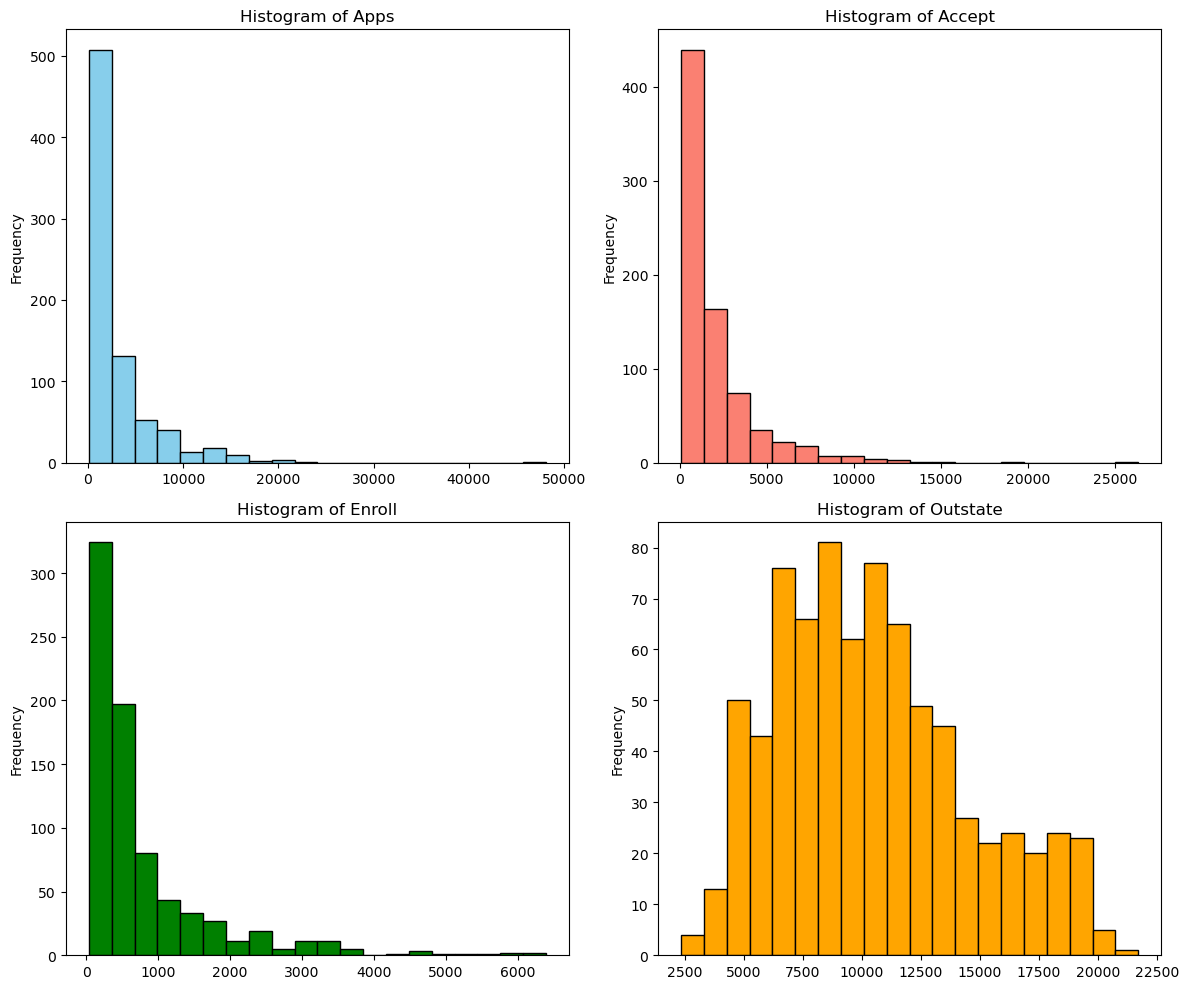

In [35]:
# Create subplots with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot histograms for different quantitative variables
college2['Apps'].plot.hist(ax=axes[0, 0], bins=20, edgecolor='black', color='skyblue')
axes[0, 0].set_title('Histogram of Apps')

college2['Accept'].plot.hist(ax=axes[0, 1], bins=20, edgecolor='black', color='salmon')
axes[0, 1].set_title('Histogram of Accept')

college2['Enroll'].plot.hist(ax=axes[1, 0], bins=20, edgecolor='black', color='green')
axes[1, 0].set_title('Histogram of Enroll')

college2['Outstate'].plot.hist(ax=axes[1, 1], bins=20, edgecolor='black', color='orange')
axes[1, 1].set_title('Histogram of Outstate')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()